# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [10]:
# Libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/absences.csv')

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

<AxesSubplot:xlabel='Age', ylabel='Absences'>

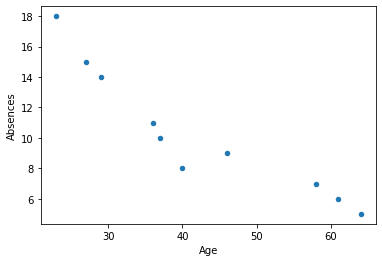

In [7]:
# your code here
data.plot.scatter('Age', 'Absences')

In [ ]:
# your comments here
# I can see a negative correlation.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [ ]:
"""
#Slope
bill_mean = np.mean(bill)
tip_mean = np.mean(tip)

xi_x = np.array([b - bill_mean for b in bill ])
yi_y = np.array([t - tip_mean for t in tip ])

numerator = np.sum(xi_x * yi_y)

xi_x2 = np.array([(b - bill_mean)**2 for b in bill ])
denominator = np.sum(xi_x2)

slope = numerator / denominator

# Intercept

intercept = tip_mean - (slope*bill_mean)

print(slope, intercept)
"""

In [41]:
# your code here
def slope_intercept(x,y):
    mean_x = x.mean()
    mean_y = y.mean()

    xi_x = np.array([a - mean_x for a in x])
    yi_y = np.array([ab - mean_y for ab in y])
    xi_x2 = np.array([(a - mean_x)**2 for a in x])

    numerator = np.sum(xi_x * yi_y)
    denominator = np.sum(xi_x2)

    slope = numerator / denominator
    intercept = mean_x - (slope*mean_y)
    
    return slope, intercept


In [42]:
slope, intercept = slope_intercept(data['Age'], data['Absences'])

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [43]:
slope

-0.2681088337033404

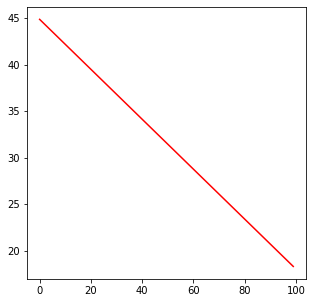

In [44]:
# your code here
import matplotlib.pyplot as plt
x = np.arange(0,100)
reg_line = slope*x + intercept
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, reg_line, label = 'Regression', c = 'red')

In [27]:
# your comments here
# We can see that there is a negative correlation

<AxesSubplot:xlabel='Age', ylabel='Absences'>

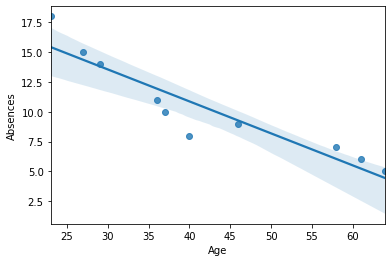

In [45]:
import seaborn as sns
sns.regplot(x='Age', y='Absences', data=data)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [76]:
# your code here
def cov_corr(x,y):
    mean_x = x.mean()
    mean_y = y.mean()

    std_age = x.std()
    std_abs = y.std()
    xi_x = np.array([a - mean_x for a in x])
    yi_y = np.array([ab - mean_y for ab in y])
    numerator = np.sum(xi_x * yi_y)
    denominator_corr = std_age*std_abs
    covariance = numerator / (len(y)-1)
    correlation = covariance / denominator_corr
    return covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [77]:
# your code here
cov_corr(data['Age'], data['Absences'])

(-57.699999999999996, -0.9325434092481012)

In [ ]:
# your comments here
# The covariance suggests that the variables move in different directions.
# There is a strong negative correlation

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
# Yes, the older you get the more absent you are.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [46]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [48]:
# your code here
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [49]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [ ]:
# your comments here
# There is a strong correlation and covariance. This means that the the two variables are 
# positively and strongly correlated.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

<AxesSubplot:xlabel='X', ylabel='Y'>

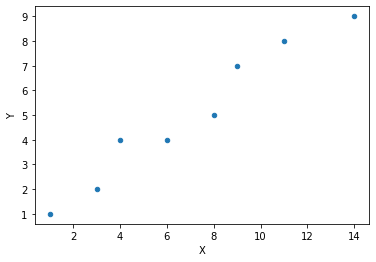

In [51]:
# your code here
ironbeers_df.plot.scatter('X','Y')

In [ ]:
# your comments here
# We can see that the points follow a clear path.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

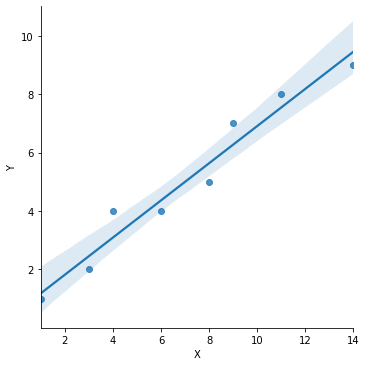

In [52]:
# your code here
sns.lmplot(x='X',y='Y',data=ironbeers_df,fit_reg=True) 

In [54]:
from scipy import stats

In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df['X'], ironbeers_df['Y'])

In [56]:
slope

0.6363636363636364

In [57]:
intercept

0.5454545454545459

In [ ]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
# My conclusion is that someone tells you to stay you most likely will stay

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [59]:
# your code here
ironbeers_df['expected_Y'] = [i*slope-intercept for i in ironbeers_df['X']]

In [62]:
ironbeers_df

,X,Y,expected_Y
0,1,1,0.090909
1,3,2,1.363636
2,4,4,2.000000
3,6,4,3.272727
4,8,5,4.545455
5,9,7,5.181818
6,11,8,6.454545
7,14,9,8.363636


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [67]:
# your code here
ironbeers_df['error'] = ironbeers_df['Y'] - ironbeers_df['expected_Y']

In [68]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,0.090909,0.909091
1,3,2,1.363636,0.636364
2,4,4,2.000000,2.000000
3,6,4,3.272727,0.727273
4,8,5,4.545455,0.454545
5,9,7,5.181818,1.818182
6,11,8,6.454545,1.545455
7,14,9,8.363636,0.636364


<AxesSubplot:xlabel='X', ylabel='error'>

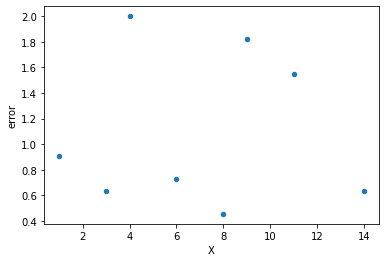

In [69]:
ironbeers_df.plot.scatter('X','error')

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here
# Most of values are close to zero but we have 3 outliers.

#### 4.- Remove the points with a high error and recalculate the regression line.

In [71]:
# your code here
ironbeers_drop = ironbeers_df.drop([2,5,6], axis=0)

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [72]:
# your code here
ironbeers_drop.corr()

,X,Y,expected_Y,error
X,1.000000,0.999006,1.000000,-0.541736
Y,0.999006,1.000000,0.999006,-0.503735
expected_Y,1.000000,0.999006,1.000000,-0.541736
error,-0.541736,-0.503735,-0.541736,1.000000


In [ ]:
# your comments here
# The correlation is now 0.999. By eliminating the outliers we obtain an almost perfect
# correlation.